# 实验一 基本图像操作方法实验

## 1.	实验要求
- 读入一幅图像，然后输出其直方图、累积直方图；
- 将RGB模式下的彩色图像转化成灰度图像、黑白图像，以及HSV等其他模式的图像，分析其区别。
- 针对读入的图像，对其进行滤波操作（要求不少于5种滤波方式），并对滤波后的结果进行分析与比较。

## 2. 实验内容

### 2.1 读入图像并输出直方图和累积直方图

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

(165, 305, 3)


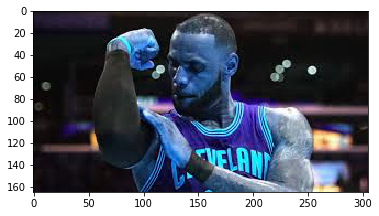

In [33]:
## 读入图像
img = cv2.imread('./lbj.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

In [19]:
##计算累积直方图
def cal(array):
    new_array = np.zeros(array.shape)
    for i in range(len(array)):
        new_array[i, 0] = np.sum(array[:i+1])
    return new_array

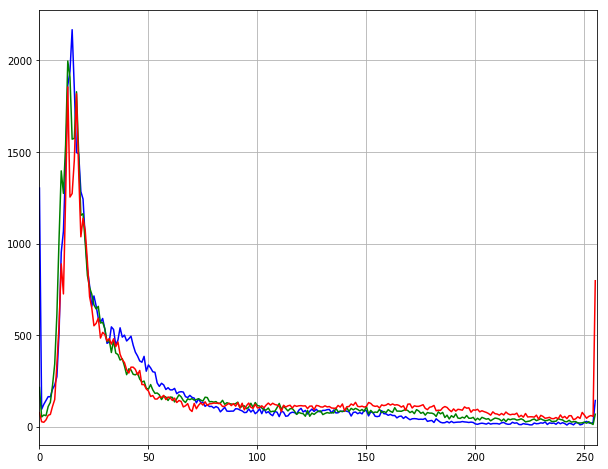

In [24]:
## 输出其统计直方图
plt.figure(figsize=(10, 8))
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.grid('on')
plt.savefig('统计直方图.png')
plt.show()

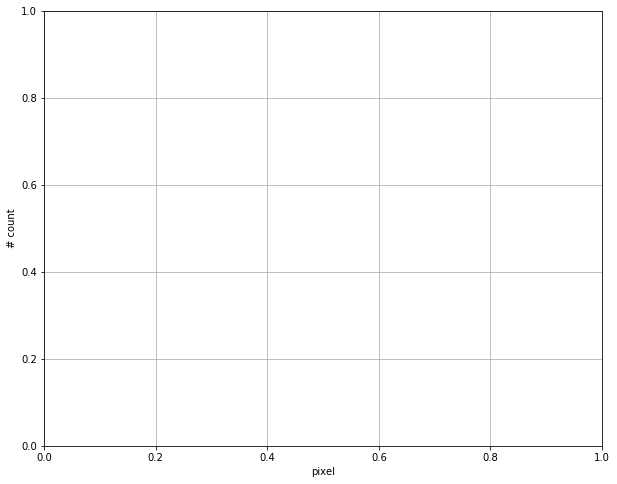

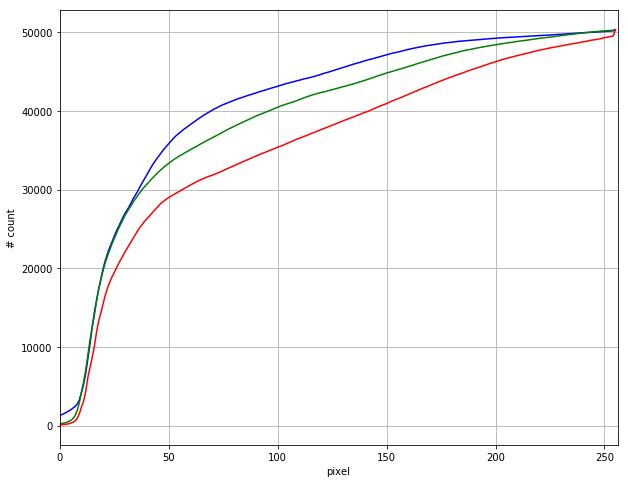

In [20]:
##累积直方图
plt.figure(figsize=(10, 8))
plt.xlabel('pixel')
plt.ylabel('# count')
plt.grid('on')
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(cal(histr), color=col)
    plt.xlim([0, 256])
plt.savefig('cumulative_stat.png')
plt.show()

### 2.2 将RGB模式下的彩色图像转化成灰度图像、黑白图像，以及HSV

#### 2.2.1 灰度图

(165, 305)


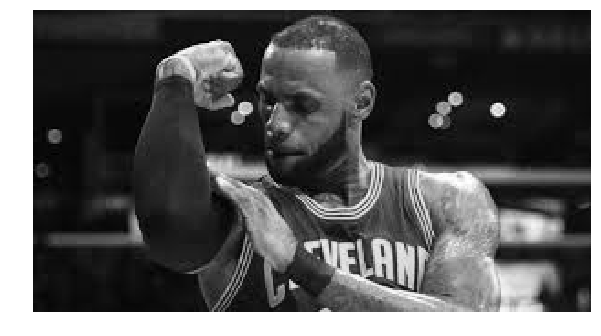

In [23]:
## 转化为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.savefig('gray_lbj.png')
plt.show()

此处可见输出的图片的形状是二维的，而上面原始图像输出的图像的形状是三维的。也就是说灰度化将图片中的RGB三个通道转为只有一个灰度通道。

(0, 256)

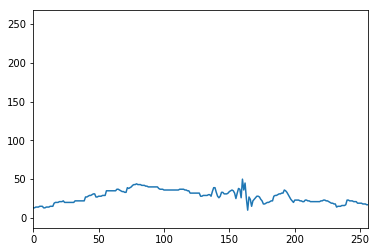

In [5]:
plt.plot(gray.ravel())
plt.xlim([0, 256])

#### 2.2.2 二值图

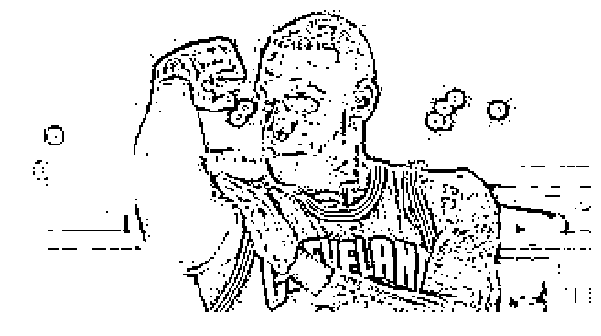

In [27]:
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(binary, cmap='gray')
plt.savefig('binary.png')
plt.show()

#### 2.2.3 HSV

(165, 305, 3)


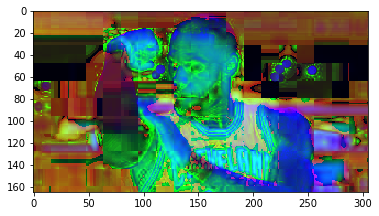

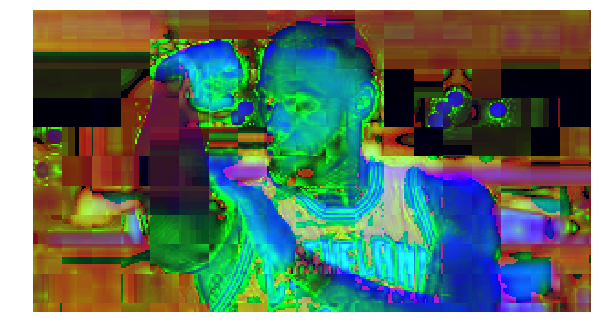

In [30]:
## 转为HSV图像
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv.shape)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(hsv)
plt.savefig('hsv.png')
plt.show()

### 2.3 滤波

#### 2.3.1 高斯滤波

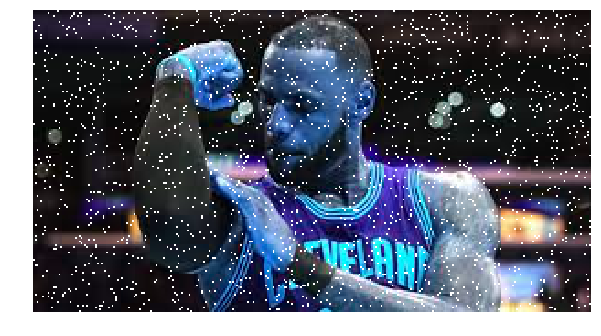

In [34]:
## 制造噪声图像
noise = img.copy()
plt.figure(figsize=(10, 8))
plt.axis('off')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    noise[temp_x][temp_y] = 255
plt.imshow(noise)
plt.savefig('noise.png')
plt.show()

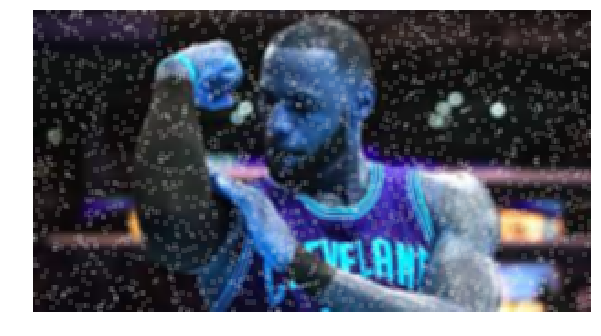

In [35]:
Gaussian_blur = cv2.blur(noise, (3, 3), 0)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(Gaussian_blur)
plt.savefig('3by3_Gaussian.png')
plt.show()

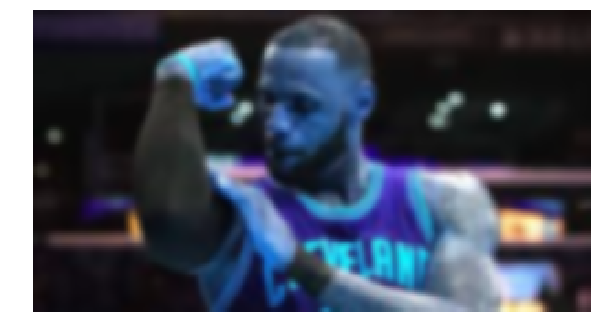

In [36]:
blur = cv2.GaussianBlur(img, (9, 9), 0)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(blur)
plt.savefig('9by9_Gaussian.png')
plt.show()

增大高斯核的大小可见图像得模糊度变大了，但是去噪效果更好了

#### 2.3.2 中值滤波

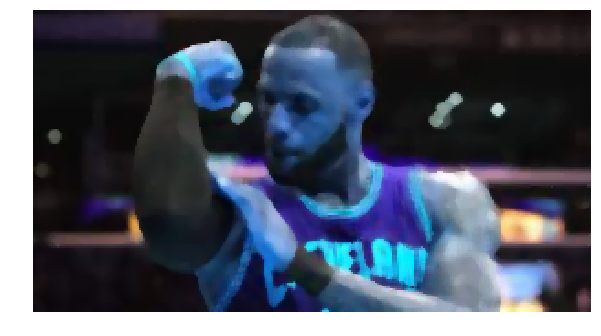

In [37]:
median_blur = cv2.medianBlur(noise, 5)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(median_blur)
plt.savefig('5by5_median.png')
plt.show()

中值滤波适合过滤椒盐型噪声

#### 2.3.3 均值滤波

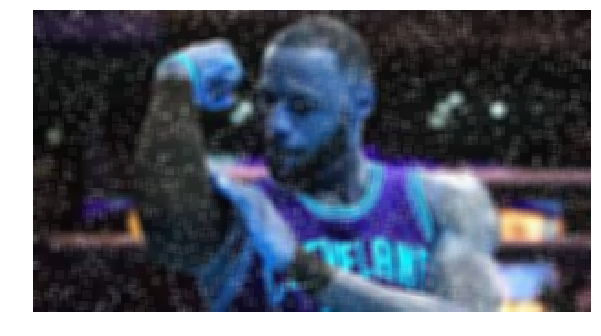

In [38]:
mean_blur = cv2.blur(noise, (5, 5))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(mean_blur)
plt.savefig('5by5_mean.png')
plt.show()

#### 2.3.4 Canny 算子滤波

使用Canny算子进行边缘检测，此处我将使用自己构造的卷积核

In [42]:
kernel_canny = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

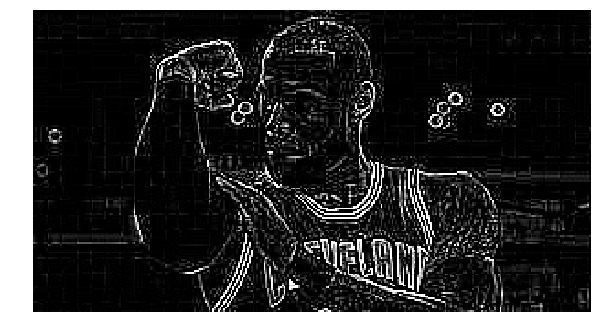

In [46]:
canny_img = cv2.filter2D(gray, -1, kernel_canny)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(canny_img, cmap='gray')
plt.savefig('canny.png')
plt.show()

#### 2.3.5 Sobel算子滤波

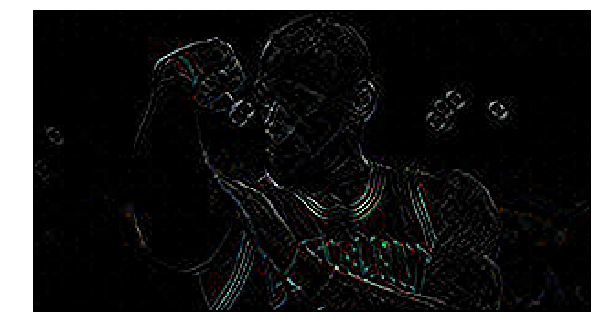

In [48]:
sobel = cv2.Sobel(img, -1, 1, 1)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(sobel)
plt.savefig('sobel.png')
plt.show()